# ДЗ4

## Задание №1

### П. 1.

Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 

In [1]:
with open('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding='utf-8') as f: 
        text = f.read()

text1 = text.lower()
text2 = [word.strip("!\"#$%&'()*+,./:;<=>?@[\]^_`{|}~„“«»†*—\/-") for word in text1.split()]         
text3 = ' '.join(text2) 
from pymystem3 import Mystem
m = Mystem()
lemmas = m.lemmatize(text3)
lemmas1 = ''.join(lemmas) 

with open('lemmas.txt', 'w', encoding='utf-8') as f:
    f.write(lemmas1)

### П.2.

Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

1) создаем словарь 

In [16]:
from collections import Counter 

s=Counter(lemmas1.split())
d = {}
d1 = dict(s)
for word, count in d1.items(): 
    q = count/len(lemmas1.split()) # q - относительная частота
    d[word] = q

2) сортируем словарь

In [17]:
sorted_counts = sorted(d.items(), key=lambda x: x[1], reverse=True)

k = dict(sorted_counts)

3) создаем график

In [10]:
print(len(k)) # узнаем количество элементов в словаре для значений оси X

6698


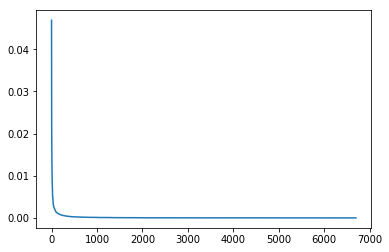

In [13]:
b = k.values()
i = list(b)

import matplotlib
import matplotlib.pyplot as plt

z = [z for z in range(0,6698)]

X = z
Y = i

plt.plot(X, Y) 
plt.show()

Итог: закон Ципфа выполняется 

### П.3.

Очистите текст от стоп-слов.

In [6]:
from nltk.tokenize import word_tokenize
a = word_tokenize(lemmas1)

from nltk.corpus import stopwords
sw = stopwords.words('english')
text5 = [w for w in a if w not in sw]

Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

1) создаем частотный словарь 

In [12]:
from collections import Counter 

o=Counter(text5)
d = {}
d1 = dict(o)
for word, count in d1.items(): 
    q = count/len(text5) # q - относительная частота
    d[word] = q

sorted_counts = sorted(d.items(), key=lambda x: x[1], reverse=True)

k = dict(sorted_counts)

2) создаем barplot

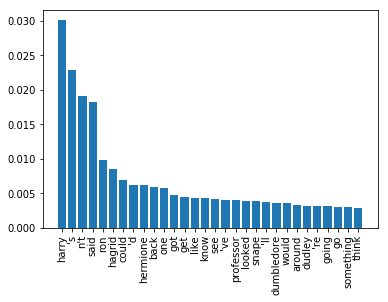

In [18]:
import matplotlib
import matplotlib.pyplot as plt

c = k.keys() 
u = list(c)
h = u[0:30] # h - значения по оси x


b = k.values()
i = list(b)
t = i[0:30] # t - значения по оси y

X = h
Y = t

plt.bar(X, Y)
plt.xticks(X, h, rotation=90)
plt.show()
